In [29]:
# Importo las librerias requeridas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Obtiene la data y la carga en un dataframe
dataIris = load_iris()
dfDataIris = pd.DataFrame(dataIris["data"])

In [31]:
# Separa los datos de entrenamiento y pruebas en la proporción por defecto 75% y 25%
dfDataEntrenamiento, dfDataPrueba = train_test_split(dfDataIris)
# Separa las variables independiente de la dependiente o variable a predecir, para el conjunto de entrenamiento y pruebas
xEntrenamiento, yEntrenamiento = dfDataEntrenamiento[dfDataEntrenamiento.columns[1:]], dfDataEntrenamiento[dfDataEntrenamiento.columns[0]]
xPrueba, yPrueba = dfDataPrueba[dfDataPrueba.columns[1:]], dfDataPrueba[dfDataPrueba.columns[0]]

In [32]:
def GenerarRegresion(xEntrenamiento, yEntrenamiento, xPrueba, yPrueba, numGrados=1):
    """Función que permite entrenar el modelo de regresión no lineal,
    datos con caracteristicas polinomicas.

    Parametros:
    ----------
    xEntrenamiento: Dataframe
        Variables independientes para entrenar.
    
    yEntrenamiento: Dataframe
        Variable dependiente o a predecir en el entrenamiento.
    
    xPrueba: Dataframe
        Variables independientes para pruebas.
    
    yPrueba: Dataframe
        Variable dependiente o a predecir en el pruebas.
    
    numGrados: Integer
        Numero de grados del polinomio

    Retorna:
    --------
    La predicciones del conjunto de datos de pruebas, 
    erro cuadratico medico del conjunto de entrenamiento y pruebas.
    """
    expansion = PolynomialFeatures(degree=numGrados)
    caracteristicasEntrenamiento = expansion.fit_transform(xEntrenamiento)
    caracteristicasPruebas = expansion.transform(xPrueba)
    regresion = LinearRegression().fit(caracteristicasEntrenamiento, yEntrenamiento)
    prediccionEntrenamiento = regresion.predict(caracteristicasEntrenamiento)
    prediccionPruebas = regresion.predict(caracteristicasPruebas)
    mseEntrenamiento = mean_squared_error(yEntrenamiento, prediccionEntrenamiento)
    msePrueba = mean_squared_error(yPrueba, prediccionPruebas)
    return prediccionPruebas, mseEntrenamiento, msePrueba


In [33]:
# Ejecuta en el entrenamiento para los grados del 1 al 4 y almacena los resultados en una lista
resultado = []
for i in range(1, 4):
        resultado.append(GenerarRegresion(xEntrenamiento, yEntrenamiento, xPrueba, yPrueba, i))

Grado 1
MSE entrenamiento 0.0982
MSE prueba 0.0933
Grado 2
MSE entrenamiento 0.0905
MSE prueba 0.089
Grado 3
MSE entrenamiento 0.0737
MSE prueba 0.1811


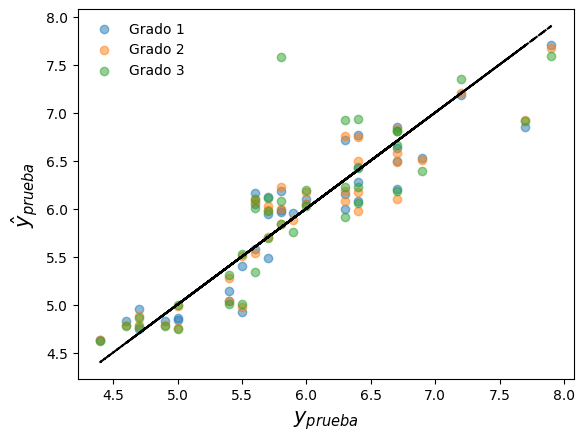

In [34]:
# Visualizar los resultados
plt.figure()
i = 1
for r in resultado:
    plt.scatter(yPrueba, r[0], alpha=0.5, label=f"Grado {i}")
    print(f"Grado {i}")
    print(f"MSE entrenamiento {np.round(r[1], 4)}")
    print(f"MSE prueba {np.round(r[2], 4)}")
    i += 1

plt.plot(yPrueba, yPrueba, ls="dashed", color="black")
plt.xlabel(r"$y_{prueba}$", size=15)
plt.ylabel(r"$\hat{y}_{prueba}$", size=15)
leg = plt.legend()
leg.draw_frame(False)